# Final Report
By: Liam Woodward | James Rabuzzi | Matthew Kennedy

## Introduction

For our project, we used Covid-19 data and Public Art data as our metrics to determine the best neighborhood in Pittsburgh. We decided to use Covid-19 data because the Covid-19 pandemic is one of the most prominent issues currently, and any neighborhood that purports to be the best must be handling Covid-19 well. Public art was chosen as a metric because it would be unique and was a way to measure culture in neighborhoods.

We combined these different metrics by finding the top 5 neighborhoods in the Public Art Metric and choosing the one with the best Covid-19 score.

We also considered using air quality and fire incidents as metrics, but determined that analyzing this data would have been too complicated.

## Our Metrics

### Covid-19 Data

Our approach to using the Covid-19 data was to weigh the cases, deaths, and individuals tested and determine an overall score for each neighborhood.

We start by importing pandas and numpy.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

Next, we retrieve the latest Covid-19 data from the WPRDC.

In [2]:
covid_data = pd.read_csv("https://data.wprdc.org/datastore/dump/0f214885-ff3e-44e1-9963-e9e9062a04d1",
                         index_col="neighborhood_municipality",
                         parse_dates=True)

This data includes every neighborhood, alongside the number of cases, deaths, and individuals tested to date, as you can see below.

In [3]:
covid_data.head(5)

,indv_tested,cases,deaths,update_date
neighborhood_municipality,,,,
Aleppo,389,14,0,2020-11-16
Allegheny Center (Pittsburgh),233,23,0,2020-11-16
Allegheny West (Pittsburgh),121,5,0,2020-11-16
Allentown (Pittsburgh),374,38,0,2020-11-16
Arlington (Pittsburgh),306,32,1,2020-11-16


In accordance with the comparative importance of these three metrics for Covid-19 described above, we will assign a score from 0 to 1 to each neighborhood. The number of cases will constitute 50% of this score; the number of deaths, 40%; and the number of tests, 10%.

The scores are weighted this way because cases lead to more cases, and more cases lead to more deaths. Thus, the number of cases is more important than the number of deaths, as cases cause deaths. The number of individuals tested is far less important than both the cases and deaths, as a neighborhood with few cases and deaths will have little need to test a large number of individuals; such an endeavor would be costly and unnecessary. Thus, cases and deaths together are far more important than the number of individuals tested.

The score for each neighborhood's cases is scaled so that the neighborhood with the most cases has a score of 0, and a neighborhood with no cases has the maximum score. The score for each neighborhood's deaths is calculated in the same way. The score for each neighborhood's testing is calculated so that the neighborhood with the largest number of tests receives the highest score.

In [4]:
cases_max = covid_data['cases'].max()
deaths_max = covid_data['deaths'].max()
testing_max = covid_data['indv_tested'].max()
scores = {}
for index, row in covid_data.iterrows():
    cases_score = 0.5 * (1 - (row['cases'] / cases_max)) # 50%
    deaths_score = 0.4 * (1 - (row['deaths'] / deaths_max)) # 40%
    testing_score = 0.1 * (row['indv_tested'] / testing_max) # 10%
    scores[index] = cases_score + deaths_score + testing_score
scores

{'Aleppo': 0.8946378065191067,
 'Allegheny Center (Pittsburgh)': 0.887261212150421,
 'Allegheny West (Pittsburgh)': 0.8979114397885084,
 'Allentown (Pittsburgh)': 0.8788472830158496,
 'Arlington (Pittsburgh)': 0.8735899655492783,
 'Arlington Heights (Pittsburgh)': 0.8913987253323665,
 'Aspinwall': 0.8866567467952398,
 'Avalon': 0.8434761323591001,
 'Baldwin Borough': 0.3410985838936953,
 'Baldwin Township': 0.8742515328267227,
 'Banksville (Pittsburgh)': 0.7418481759417165,
 'Bedford Dwellings (Pittsburgh)': 0.870843442061848,
 'Beechview (Pittsburgh)': 0.8329559719703493,
 'Bell Acres': 0.8933543379924095,
 'Bellevue': 0.8347039266592298,
 'Beltzhoover (Pittsburgh)': 0.8732899849028684,
 'Ben Avon': 0.8881030933193779,
 'Ben Avon Heights': 0.8975146911916437,
 'Bethel Park': 0.6670962428335305,
 'Blawnox': 0.8800446780223011,
 'Bloomfield (Pittsburgh)': 0.8394517465993632,
 'Bluff (Pittsburgh)': 0.8365513239798551,
 'Bon Air (Pittsburgh)': 0.8963463853574825,
 'Brackenridge': 0.846388

We now compile these scores into a new dataframe, and we can analyze the graph to determine which neighborhoods have the best score, and thus have handled the Covid-19 the best:

In [5]:
scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=['score'])

<AxesSubplot:>

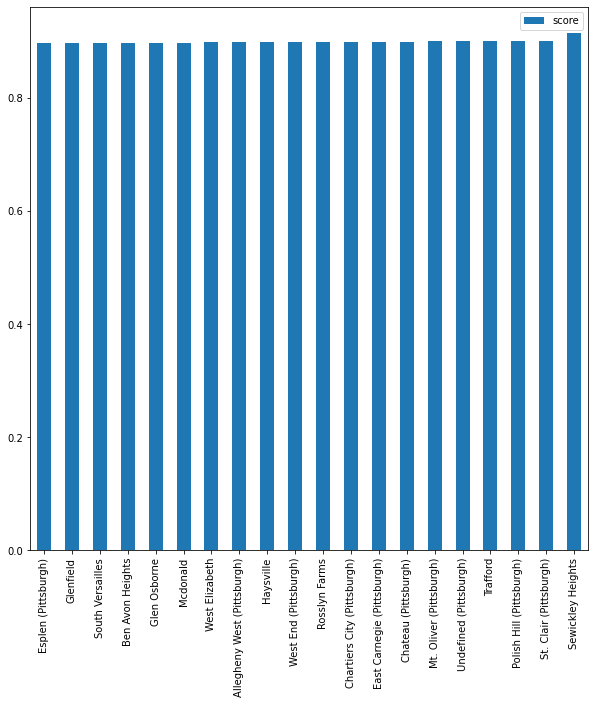

In [6]:
scores_df.sort_values('score').tail(20).plot(kind="bar",figsize=(10,10))

As you can see, the scores are fairly close up to 2nd place. However, Sewickley Heights has the best score by a confident margin.

#### Conclusion

My personal favorite neighborhood since moving on campus is definitely Oakland. The "best neighborhood" from my data, however, is Sewickley Heights. I'm not particularly surprised or disappointed by this outcome; I didn't expect Oakland to win on this metric, and apparently Sewickley Heights is one of the wealthiest neighborhoods in the state and has a relatively low population, so this outcome is not particularly surprising.

### Public Arts Data

When determining "bestness" based on public art in the neighborhood, I had two measurements, quantity and diversity. The top 5 neighborhoods were the 5 neighborhoods with the most art. Then, their places were determined by how many different types of pieces they had, with the most types being most important, and then the amount of each type the neighborhood had was next important. This gave my top 5 neighborhoods as such,
1. Central Business District with 5 types of art.
2. Allegheny Center with 4 types that had 3 close to evenly spread types.
3. South Side Flats had 4 types but two were more dominant than the other two.
4. Squirrel Hill South also had 4 types but while three were almost perfectly split, half of the neighborhood's pieces were all one type.
5. Highland Park had only 10 pieces and only 3 types of art in it.

First I took a graph of how much art each neighborhood had because I knew it would be the simpler part to get done. This gave me the top 5 neighborhoods previously listed.

<AxesSubplot:>

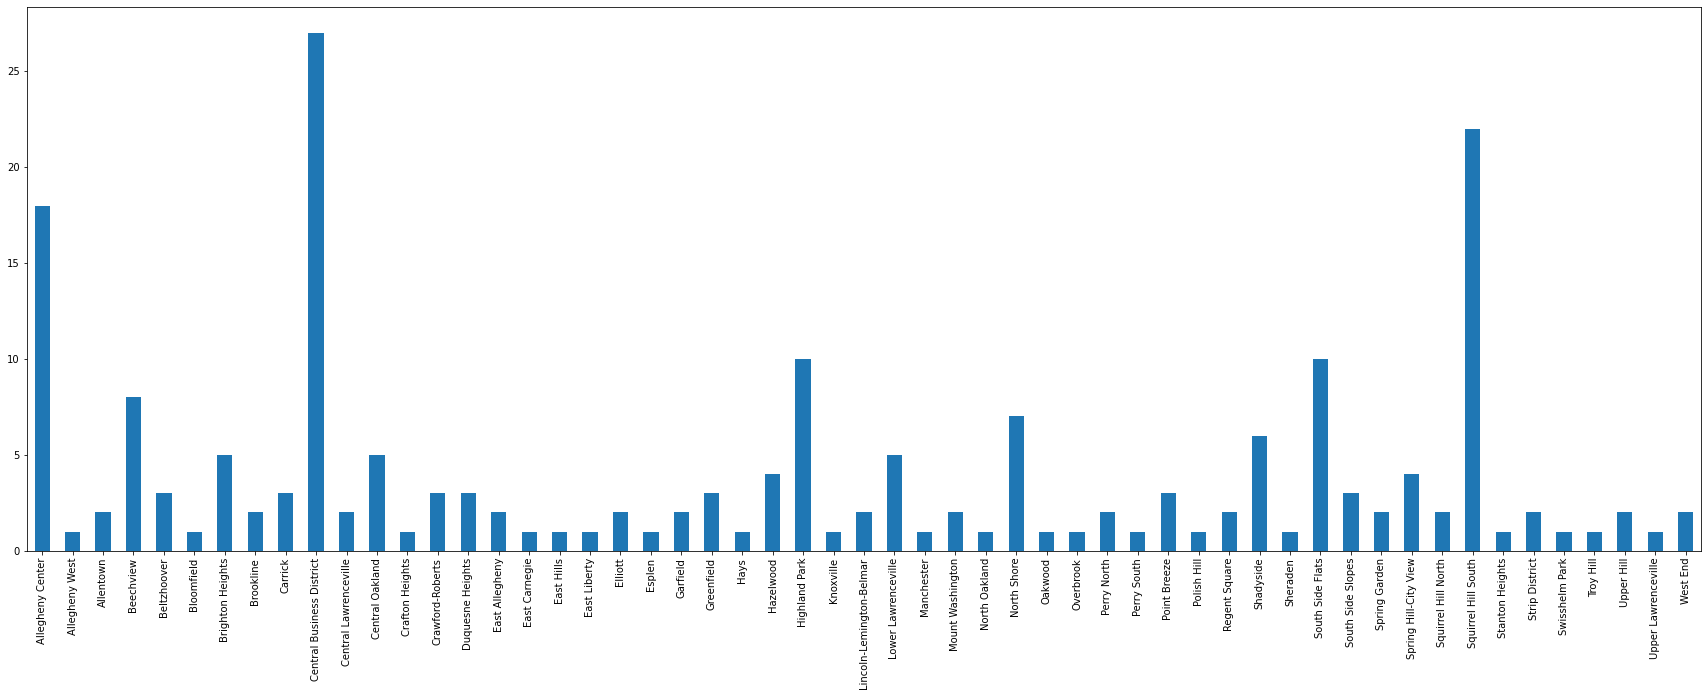

In [7]:
import matplotlib.pyplot as plt
art_data = pd.read_csv("https://data.wprdc.org/datastore/dump/00d74e83-8a23-486e-841b-286e1332a151", index_col = "id")
art_data["neighborhood"].value_counts().sort_index().plot(kind='bar', rot= 'vertical', figsize = (30, 10))

#### Measuring Diversity
For my second metric I took the top 5 neighborhoods and then I measured how many pieces of the 5 types they had. These types of pieces were labeled by the dataset as individual and historic monuments, historic art, war memorials, modern and contemporary art, and non-city owned.
Here is an example of the process for finding the distribution of types using the Central Business District's data. The only thing missing from this example is that after finishing cbd, I printed out its contents and manually counted the amount of each type which I then typed into cbd_amounts.

([<matplotlib.patches.Wedge at 0x7f18465b0e50>,
 [Text(1.070349357197973, 0.2536774596724868, 'Historic Art'),
  Text(-0.31548357059890975, 1.0537884591710818, 'Individual and Historic Monuments'),
  Text(-0.6568744447537896, -0.8823355165861798, 'Modern and Contemporary Art'),
  Text(0.3154835459332104, -1.0537884665555075, 'Non-City Owned'),
  Text(0.9190365757857503, -0.6044599013731209, 'War Memorials')])

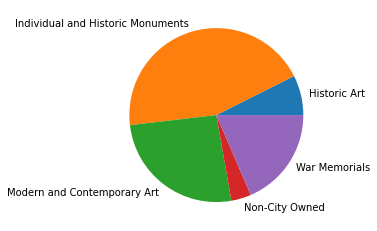

In [8]:
cbd = []
query_mask = art_data['neighborhood'] == "Central Business District"
i=0
column = "art_type"
while(i<len(art_data)):
    if(query_mask.iloc[i] == True):
        cbd.append([art_data['art_type'].iloc[i]])
    i+=1
cbd_amounts = [2, 12, 7, 1, 5]
types = ['Historic Art', 'Individual and Historic Monuments', 'Modern and Contemporary Art', 'Non-City Owned', 'War Memorials']
plt.pie(cbd_amounts, labels = types)

#### Public Art Data Conclusion:
Even after making a second factor for what counts as the "best" neighborhood beyond quantity, the Central Business District remains supreme. This was because of the five neighborhoods with at least 10 art pieces, the Central Business District was the only neighborhood with five different types of art. At best the other neighborhoods had 5 types.

## The Best Neighborhood

To identify the best neighborhood, we are going to go through the top several neighborhoods in the public art metric, and choose the one with the best Covid-19 score.

In [32]:
scores_df.loc[["Central Business District (Pittsburgh)", "Allegheny Center (Pittsburgh)", "Southside Flats (Pittsburgh)", "Squirrel Hill South (Pittsburgh)", "Highland Park (Pittsburgh)"]]

,score
Central Business District (Pittsburgh),0.849796
Allegheny Center (Pittsburgh),0.887261
Southside Flats (Pittsburgh),0.718985
Squirrel Hill South (Pittsburgh),0.751155
Highland Park (Pittsburgh),0.822877


Of the top 5 Public Art neighborhoods in the city of Pittsburgh, Allegheny Center had the best Covid-19 handling score by a large margin. Thus, Allegheny Center is the best neighborhood in Pittsburgh according to our metrics.

Out of all the the neighborhoods in Pittsburgh, Allegheny Center places 58th out of 221 neighborhoods for handling Covid-19, and 2nd in Public Art. However, considering that the top 60 neighborhoods all have a similar Covid-19 score, do not be confused by the fact that Allegheny Center placed 58th out of 221 neighborhoods; they still handled Covid-19 very well.

The following are neighborhoods 60-56 in terms of how they handled Covid-19.

In [39]:
scores_df.sort_values('score').tail(60).head(5)

,score
Aspinwall,0.886657
Regent Square (Pittsburgh),0.887157
Allegheny Center (Pittsburgh),0.887261
Verona,0.887883
Ben Avon,0.888103


The following are the top 5 neighborhoods in handling Covid-19.

In [38]:
scores_df.sort_values('score').tail(5)

,score
Undefined (Pittsburgh),0.900019
Trafford,0.900058
Polish Hill (Pittsburgh),0.900063
St. Clair (Pittsburgh),0.900290
Sewickley Heights,0.915137


As you can see, Allegheny Center is only 3% below that of the best neighborhood. Thus, its performance in the Public Arts data is more significant than the tiny differential between it and the neighborhood with the best Covid-19 score.

## Conclusion

Liam: I grew up in Pleasant Hills and still live there, so that's my favorite neighborhood. However, Pleasant Hills faired pretty poorly in both metrics compared to Allegheny Center. I'm not surprised that Pleasant Hills did not win, though; there is not a lot of art there, and it is a populated suburban area, so it is expected that it would handle Covid-19 fairly poorly too.

James: Despite being a Pittsburgh native I don't really have a favorite neighborhood, I'm from Point Breeze but also like Squirrel Hill and Oakland. Most of Pittsburgh I don't really have any strong opinions about. So while my favorites got screwed by the different location variants of them I'm not very surprised, like how Oakland is split up into various North, South and Central I can't say it was very surprising. Also, Point Breeze isn't exactly large so while it did will with Covid-19 scoring, I wasn't expecting it to do well overall because it doesn't have much art.